In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
bn=load_boston()

In [5]:
data=pd.DataFrame(bn.data,columns=bn.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [8]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
from sklearn.model_selection import train_test_split


In [9]:
X=data
y=bn.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [11]:
lr1.fit(X_train,y_train)
lr1.score(X_test,y_test)

0.7789410172622865

In [12]:
print('coefficients= ',lr1.coef_)
print('intercept= ',lr1.intercept_)

coefficients=  [-1.14428903e-01  5.71299780e-02  3.83002824e-02  2.42854641e+00
 -2.12326236e+01  2.87723416e+00  6.91118094e-03 -1.47158266e+00
  3.05784197e-01 -1.06750361e-02 -9.96138270e-01  6.27746234e-03
 -5.57414427e-01]
intercept=  45.1925153883839


In [13]:
list(zip(data.columns,lr1.coef_))

[('CRIM', -0.11442890306628273),
 ('ZN', 0.05712997804798614),
 ('INDUS', 0.03830028239368924),
 ('CHAS', 2.4285464082017474),
 ('NOX', -21.232623560528594),
 ('RM', 2.8772341560061894),
 ('AGE', 0.006911180936367702),
 ('DIS', -1.471582661183941),
 ('RAD', 0.3057841971271421),
 ('TAX', -0.010675036077892181),
 ('PTRATIO', -0.9961382695506952),
 ('B', 0.006277462341292091),
 ('LSTAT', -0.5574144267109958)]

In [14]:
data['target']=bn.target

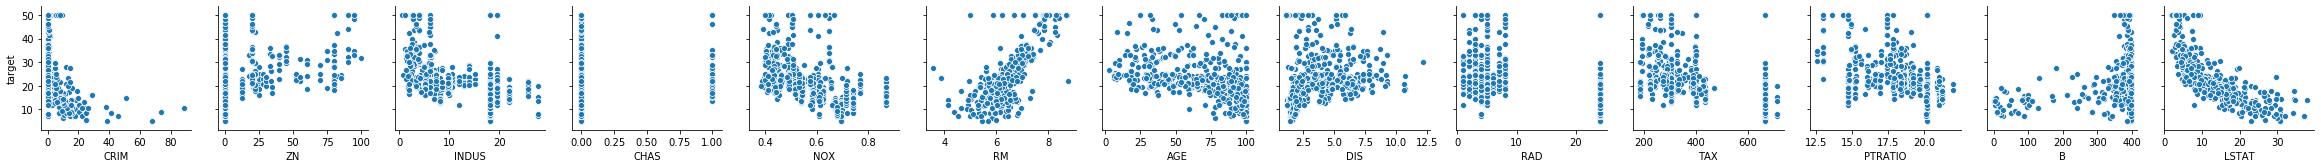

In [20]:
sns.pairplot(x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],y_vars=['target'],data=data)

In [22]:
from sklearn.metrics import r2_score
lr1.fit(X[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']],y)
y_pred=lr1.predict(X[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']])
r2_score(y,y_pred)

0.7406426641094095

In [28]:
#CHAS removed

lr1.fit(X[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']],y)
y_pred=lr1.predict(X[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']])
r2_score(y,y_pred)

0.7355165089722999

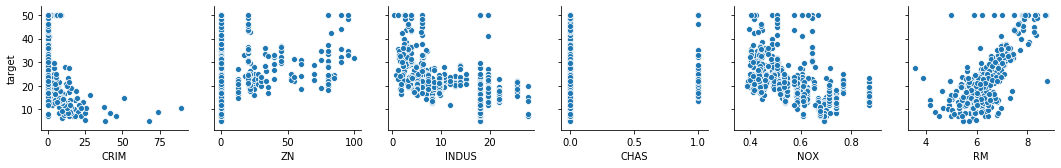

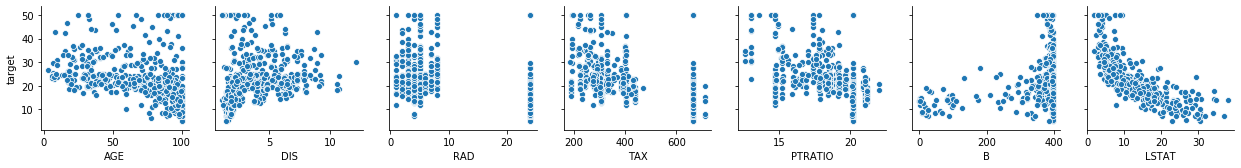

In [31]:
sns.pairplot(x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM'],y_vars=['target'],data=data)
sns.pairplot(x_vars=[ 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'],y_vars=['target'],data=data)

In [32]:
#INTERECTION TERMS

data['interection_1']=data['ZN']*data['RM']*data['DIS']*data['B']*data['INDUS']*data['PTRATIO']
data['interection_2']=data['CRIM']*data['NOX']*data['LSTAT']


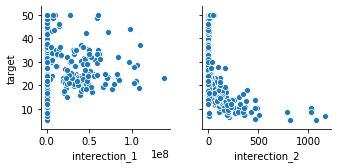

In [33]:
sns.pairplot(x_vars=['interection_1','interection_2'],y_vars=['target'],data=data)

In [36]:
data['interection_3']= 1/data['interection_2']

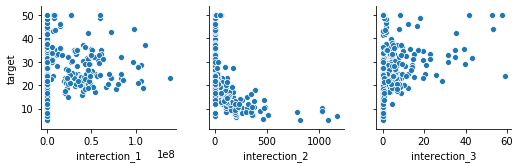

In [37]:
sns.pairplot(x_vars=['interection_1','interection_2','interection_3'],y_vars=['target'],data=data)

In [39]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,interection_1,interection_2,interection_3
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,6.790099e+06,0.016933,59.056989
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0.000000e+00,0.117069,8.541994
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0.000000e+00,0.051580,19.387356
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0.000000e+00,0.043587,22.942698
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0.000000e+00,0.168561,5.932580


In [40]:
# R Score is not improving

lr1.fit(data[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT','interection_1','interection_3']],y)
y_pred=lr1.predict(data[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT','interection_1','interection_3']])
r2_score(y,y_pred)

0.7380332404617974

In [43]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,interection_1,interection_2,interection_3
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.199558,0.941723,-0.187522
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.858252,-0.180348,0.703953
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.461202,0.372247,-0.467815
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,-0.041332,-0.070272,-0.021474
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.520803,0.412018,-0.441627
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.213206,-0.272426,0.348630
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.565061,0.335302,-0.473738
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.685197,-0.356009,0.480991
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.289115,0.573040,-0.316269
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.309573,0.534403,-0.335618


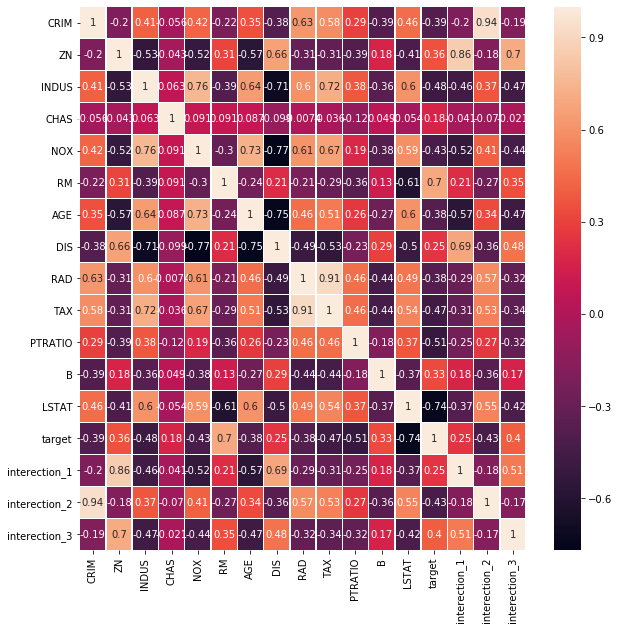

In [47]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

In [48]:
data['interection_4']=data['INDUS']*data['LSTAT']*data['TAX']*data['RAD']*data['AGE']*data['NOX']

In [50]:
# R score is still not increasing

lr1.fit(data[['INDUS', 'NOX', 'AGE', 'RAD', 'TAX','LSTAT','interection_4']],y)
y_pred=lr1.predict(data[['INDUS', 'NOX', 'AGE', 'RAD', 'TAX','LSTAT','interection_4']])
r2_score(y,y_pred)

0.5732090668562428

In [53]:
data['int_5']=data['CRIM']*data['RAD']
data['int_6']=data['ZN']*data['DIS']
data['int_7']=data['INDUS']*data['TAX']
data['int_8']=data['NOX']*data['AGE']

In [54]:
# R Score is still not improved

lr1.fit(data[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT','int_5','int_6','int_7','int_8']],y)
y_pred=lr1.predict(data[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT','int_5','int_6','int_7','int_8']])
r2_score(y,y_pred)

0.7456355755555037

Feature: 0, Score: 1.82605
Feature: 1, Score: -0.02676
Feature: 2, Score: -0.31198
Feature: 3, Score: -22.08599
Feature: 4, Score: 3.89872
Feature: 5, Score: 0.00379
Feature: 6, Score: -1.78884
Feature: 7, Score: 0.40528
Feature: 8, Score: -0.03007
Feature: 9, Score: -0.96602
Feature: 10, Score: 0.01082
Feature: 11, Score: -0.52262
Feature: 12, Score: -0.08105
Feature: 13, Score: 0.01133
Feature: 14, Score: 0.00097
Feature: 15, Score: -0.02073


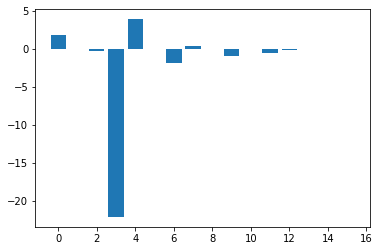

In [56]:
#   *****FEATURE IMPORTANCE

importance = lr1.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [57]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,target,interection_1,interection_2,interection_3,interection_4,int_5,int_6,int_7,int_8
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,...,0.455621,-0.388305,-0.199558,0.941723,-0.187522,0.682464,0.998679,-0.179744,0.541554,0.419420
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,...,-0.412995,0.360445,0.858252,-0.180348,0.703953,-0.280115,-0.189689,0.958455,-0.440090,-0.545446
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,...,0.603800,-0.483725,-0.461202,0.372247,-0.467815,0.586993,0.392822,-0.493207,0.900982,0.747381
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,...,-0.053929,0.175260,-0.041332,-0.070272,-0.021474,-0.067531,-0.061335,-0.058234,0.013176,0.092725
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,...,0.590879,-0.427321,-0.520803,0.412018,-0.441627,0.634384,0.399378,-0.495590,0.760036,0.908800
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,...,-0.613808,0.695360,0.213206,-0.272426,0.348630,-0.314920,-0.211813,0.236642,-0.343593,-0.283351
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,...,0.602339,-0.376955,-0.565061,0.335302,-0.473738,0.499472,0.336826,-0.545948,0.612964,0.942636
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,...,-0.496996,0.249929,0.685197,-0.356009,0.480991,-0.508089,-0.365299,0.722001,-0.662490,-0.792243
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,...,0.488676,-0.381626,-0.289115,0.573040,-0.316269,0.867109,0.634869,-0.282708,0.825306,0.559560
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,...,0.543993,-0.468536,-0.309573,0.534403,-0.335618,0.825424,0.586218,-0.266498,0.932986,0.623086


In [58]:
#I have used here the feature_important attributes but still the R Score is not improving

lr2=LinearRegression()
lr2.fit(data[['CRIM','RM','B','int_6','int_7']],y)
y_pred=lr2.predict(data[['CRIM','RM','B','int_6','int_7']])
r2_score(y,y_pred)

0.5865689747187387

In [27]:
from sklearn.metrics import mean_squared_error
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
pred1=lr1.predict(X_test)
print('RMSE= ',np.sqrt(mean_squared_error(y_test,pred1)))

RMSE=  4.679504823808757


In [23]:
#you cannot input the values like this

lr1.fit(X,y)
y_pred=lr1.predict(X)
r2_score(y,y_pred)

1.0

# linear regression is predicting at best 74%
# better to switch to other linear models knn or random forest

In [59]:
data1=pd.DataFrame(bn.data,columns=bn.feature_names)
X=data1
y=bn.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2)

In [60]:
from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
print('training score= ',reg.score(X_train,y_train))
print('testing score= ',reg.score(X_test,y_test))

training score=  0.7500428443527125
testing score=  0.5842887812992229


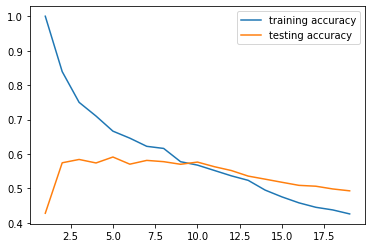

In [63]:
# we got a underfitting model,try diff
training_acc=[]
testing_acc=[]
neighbors=range(1,20)

#trying n-neighbors from 1 to 10

for n_neighbors in neighbors:
    clf=KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_acc.append(clf.score(X_train,y_train))
    testing_acc.append(clf.score(X_test,y_test))
    
plt.plot(neighbors,training_acc,label='training accuracy')
plt.plot(neighbors,testing_acc,label='testing accuracy')
plt.legend()

In [64]:
# knn is not good with high dimesional data,provrd --max acc 60%

In [65]:
#lets try ridge regg
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

training set score: 0.732041
test set score: 0.745619


In [66]:
#so here the accuracy is same--as b4---so they are commiting the same no of mistakes

#lets change model complexity

In [67]:
# alpha =10
#no improvement

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))

training set score: 0.725273
test set score: 0.738634


In [68]:
#similar to linear regression

ridge10 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))

training set score: 0.734062
test set score: 0.749747


In [69]:
#even lasso not givinf good results

from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("training set score: %f" % lasso.score(X_train, y_train))
print("test set score: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ != 0))

training set score: 0.676300
test set score: 0.705244
number of features used: 10


In [70]:
#alpha = 0.01
#no improvement

lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("training set score: %f" % lasso001.score(X_train, y_train))
print("test set score: %f" % lasso001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso001.coef_ != 0))

training set score: 0.733696
test set score: 0.749065
number of features used: 13


In [71]:
#low alpha still no improvent

lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("training set score: %f" % lasso00001.score(X_train, y_train))
print("test set score: %f" % lasso00001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso00001.coef_ != 0))

training set score: 0.734122
test set score: 0.750303
number of features used: 13


In [73]:
#All the training data got trained---but bad predictor

from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor(random_state=5)
dr.fit(X_train,y_train)
print("training set score: %f" % dr.score(X_train, y_train))
print("test set score: %f" % dr.score(X_test, y_test))

training set score: 1.000000
test set score: 0.681190


In [77]:

dr2=DecisionTreeRegressor(max_depth=21,random_state=5)
dr2.fit(X_train, y_train)
print("accuracy on training set: %f" % dr2.score(X_train, y_train))
print("accuracy on test set: %f" % dr2.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.681190


In [78]:
#  ######      yeahhhhh finally''''''''''

from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(random_state=4)
forest.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 0.981694
accuracy on test set: 0.887137


In [79]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(random_state=4,n_estimators=5)
forest.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 0.968690
accuracy on test set: 0.872452


In [82]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(random_state=4,n_estimators=20)
forest.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 0.979612
accuracy on test set: 0.875015


In [88]:
#it is ovefitting but it seems we willl get accuracy around 88%
training_acc=[]
testing_acc=[]
m=[100,200,300,400,500,600,700,800,900,1000]
for i in m:
    
    forest=RandomForestRegressor(random_state=4,n_estimators=i)
    forest.fit(X_train, y_train)
    training_acc.append(frst.score(X_train,y_train))
    testing_acc.append(frst.score(X_test,y_test))
print(training_acc)
print(testing_acc)    

[0.9816937453113831, 0.9816937453113831, 0.9816937453113831, 0.9816937453113831, 0.9816937453113831, 0.9816937453113831, 0.9816937453113831, 0.9816937453113831, 0.9816937453113831, 0.9816937453113831]
[0.8871374312452324, 0.8871374312452324, 0.8871374312452324, 0.8871374312452324, 0.8871374312452324, 0.8871374312452324, 0.8871374312452324, 0.8871374312452324, 0.8871374312452324, 0.8871374312452324]


In [89]:
#gradient boodting are better than random frst here

from sklearn.ensemble import GradientBoostingRegressor
gdb=RandomForestRegressor(random_state=4)
gdb.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 0.980845
accuracy on test set: 0.890267


# finally more than 90% by gradient boosting

In [98]:
gbrt = GradientBoostingRegressor(random_state=0, max_depth=4)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))


accuracy on training set: 0.994131
accuracy on test set: 0.905729


In [102]:
#learning rate not useful--checked wiyth various lrates

gbrt = GradientBoostingRegressor(random_state=0, max_depth=4,learning_rate=0.0001)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))


accuracy on training set: 0.017521
accuracy on test set: 0.012506


# neural network no improvement in changing alpha,hidden layer size,solver,activation

In [107]:
#neural network is also good

from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(solver='lbfgs', random_state=0)
nn.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


accuracy on training set: 0.980845
accuracy on test set: 0.890267


In [108]:
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(solver='lbfgs', random_state=0,hidden_layer_sizes=[10])
nn.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


accuracy on training set: 0.980845
accuracy on test set: 0.890267


In [109]:
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(solver='lbfgs', random_state=0,hidden_layer_sizes=[10,10])
nn.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


accuracy on training set: 0.980845
accuracy on test set: 0.890267


In [111]:
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(solver='lbfgs', random_state=0,activation='tanh',hidden_layer_sizes=[10,10])
nn.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 0.980845
accuracy on test set: 0.890267


In [114]:
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(solver='lbfgs', random_state=0,alpha=0.001,hidden_layer_sizes=[10,10])
nn.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


accuracy on training set: 0.980845
accuracy on test set: 0.890267


In [115]:
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(solver='lbfgs', random_state=0,alpha=100,hidden_layer_sizes=[10,10])
nn.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


accuracy on training set: 0.980845
accuracy on test set: 0.890267


# Conclusion::the best for this dataset is gradient boosting >>>gave> 90% accuracy